# Desarrollo Práctica 1

In [1]:
# Carga de librerías y lectura de base de datos
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Maritalstatus', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']

data

,Age,Workclass,Fnlwgt,Education,Education-num,Maritalstatus,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Predecir si los ingresos que superan los 50.000 $/año basándose en los datos del censo. También conocido como conjunto de datos "Census Income".

- age: Edad.
- workclass: tipo de trabajo ( privado, etc.)
- fnlwgt: Una estimación de la importancia de la persona en cuanto a su representatividad en relación entre la base de datos donde está. 
- education: Educaciones alcanzadas.
- education-num: # de educaciones.
- marital-status: Estado.
- occupation: Ocupación laboral.
- relationship: Relacion ( Casado, con hijos, etc.)
- race: Raza.
- sex: Sexo.
- capital-gain: Ganancias.
- capital-loss: Pérdidas.
- hours-per-week: Horas de trabajo por semana.
- native-country: País de procedencia

# 1) Conozcamos la relación de los atributos con las etiquetas

<AxesSubplot:>

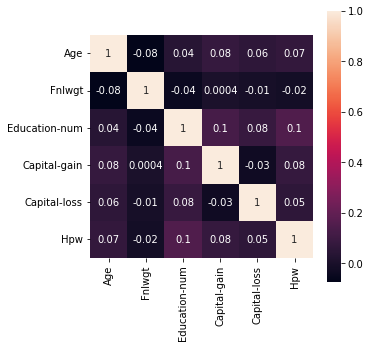

In [2]:
# Datos numéricos
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(data.corr(), square=True, annot=True, ax=ax, fmt=".1g")

De aquí, se puede concluir que ningún atributo tiene relación con otro, por ende, no se puede borrar algún atributo

In [3]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
#Medidas de centralidad para atributos categóricos:
data.mode()

,Age,Workclass,Fnlwgt,Education,Education-num,Maritalstatus,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2) Evaluar la cantidad de datos null o NaN que hay por registro y por atributos

- Cantidad Null o NaN por atributos

In [5]:
data.isnull().sum()

Age                 0
Workclass        1836
Fnlwgt              0
Education           0
Education-num       0
Maritalstatus       0
Occupation       1843
Relationship        0
Race                0
Sex                 0
Capital-gain        0
Capital-loss        0
Hpw                 0
Country           583
C                   0
dtype: int64

In [6]:
(data.isnull().sum()/len(data))*100

Age              0.000000
Workclass        5.638647
Fnlwgt           0.000000
Education        0.000000
Education-num    0.000000
Maritalstatus    0.000000
Occupation       5.660146
Relationship     0.000000
Race             0.000000
Sex              0.000000
Capital-gain     0.000000
Capital-loss     0.000000
Hpw              0.000000
Country          1.790486
C                0.000000
dtype: float64

Como se logra ver, aunque hay datos faltantes estos representan entre el 2 y 6 % de los datos. Lo que podría implicar que al eliminarlos no afectaría tanto la base. Pero tendríamos que analizar que tanta influencia tienen los atributos en la etiqueta

- Cantidad Null o Nan por registros

In [7]:
print('Cantidad máxima faltante por registros:',max(data.isnull().sum(axis=1)))

Cantidad máxima faltante por registros: 3


In [8]:
print(' Cantidad de registros con datos faltantes :',len(data[data.isnull().any(1)]))
print('Porcentaje',round((len(data[data.isnull().any(1)])/ len(data))*100,2),'%')

tres = data [(data.Workclass.isnull() & data.Occupation.isnull() & data.Country.isnull())] # 27
print(' Cantidad de registros con 3 datos faltantes :',len(tres))
print('Porcentaje',round(((len(tres)/ len(data))*100),2),'%')

faltantes1 = data [(data.Workclass.isnull() & data.Occupation.isnull() & data.Country.notnull()) ] # 1809
#faltantes2 = data [(data.Workclass.isnull() & data.Country.isnull() & data.Occupation.notnull())] DA CERO
#faltantes3 = data [(data.Occupation.isnull() & data.Country.isnull() &  data.Workclass.notnull())] DA CERO
dos = len(faltantes1)
print(' Cantidad de registros con 2 datos faltantes :',dos)
print('Porcentaje',round(((dos/ len(data))*100),2),'%')

#faltantes4 = data [(data.Workclass.isnull() & data.Occupation.notnull() & data.Country.notnull()) ] DA CERO
faltantes5 = data [(data.Workclass.notnull() & data.Country.isnull() & data.Occupation.notnull())] #556
faltantes6 = data [(data.Occupation.isnull() & data.Country.notnull() &  data.Workclass.notnull())] # 7
uno = len(faltantes5)+len(faltantes6)
print(' Cantidad de registros con 1 dato faltante :',uno)
print('Porcentaje',round((uno/ len(data))*100,2),'%')

 Cantidad de registros con datos faltantes : 2399
Porcentaje 7.37 %
 Cantidad de registros con 3 datos faltantes : 27
Porcentaje 0.08 %
 Cantidad de registros con 2 datos faltantes : 1809
Porcentaje 5.56 %
 Cantidad de registros con 1 dato faltante : 563
Porcentaje 1.73 %


Dado los resultados obtenidos, optamos por eliminar todos los datos NaN, debido a que el 7 % es muy mínimo y no afectará en el estudio

In [9]:
#print('Indice de Registros de 3',tres.index.to_list)
#print('Indice de Registros de 2',faltantes1.index.to_list)

data = data.drop(index= data[data.isnull().any(1)].index)
data


,Age,Workclass,Fnlwgt,Education,Education-num,Maritalstatus,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 3) Asignar un valor entero a las categorías de los atributos categóricos

In [10]:
data["Workclass"] = pd.factorize(data["Workclass"])[0]
data["Education"] = pd.factorize(data["Education"])[0]
data["Maritalstatus"] = pd.factorize(data["Maritalstatus"])[0]
data["Occupation"] = pd.factorize(data["Occupation"])[0]
data["Relationship"] = pd.factorize(data["Relationship"])[0]
data["Race"] = pd.factorize(data["Race"])[0]
data["Sex"] = pd.factorize(data["Sex"])[0]
data["Country"] = pd.factorize(data["Country"])[0]
data["C"] = pd.factorize(data["C"])[0]
data

,Age,Workclass,Fnlwgt,Education,Education-num,Maritalstatus,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,1,9,2,0,1,0,0,38,0,0
32557,40,2,154374,1,9,1,8,1,0,0,0,0,40,0,1
32558,58,2,151910,1,9,6,0,4,0,1,0,0,40,0,0
32559,22,2,201490,1,9,0,0,3,0,0,0,0,20,0,0


# 4) Análisis de datos atípicos

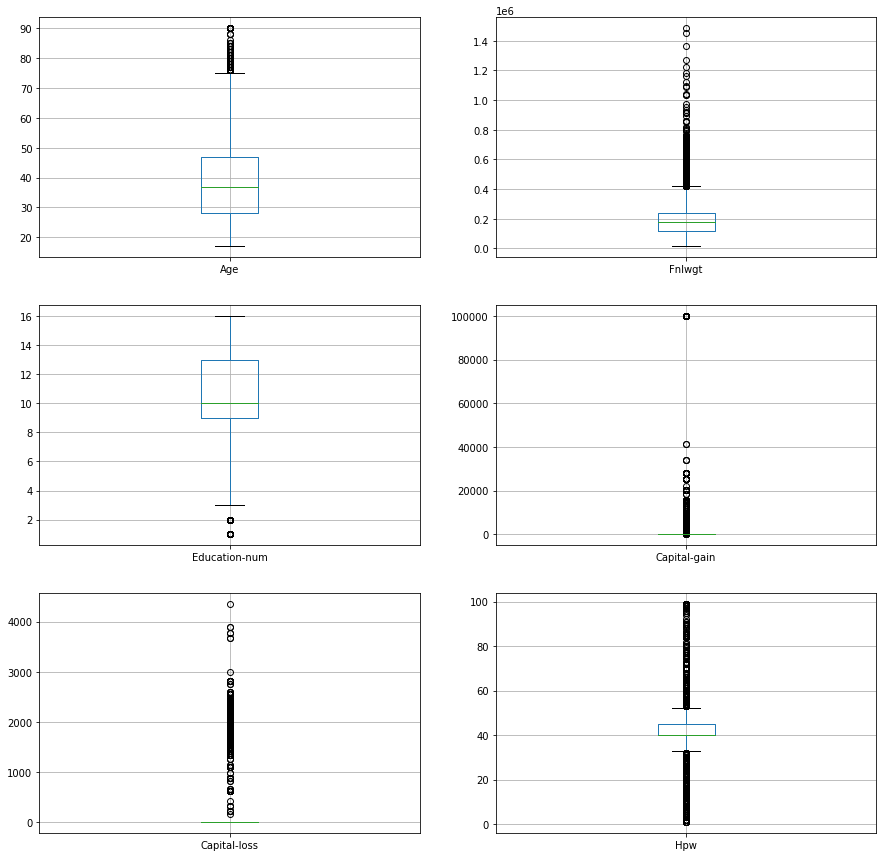

In [11]:
#Diagrama de cajas y bigotes para atributos numéricos
fig, axes = plt.subplots(3,2,figsize=(15,15))
numericas=['Age','Fnlwgt','Education-num','Capital-gain','Capital-loss','Hpw']
y = 0

for i in numericas:
    a = data.boxplot(i,ax=axes.flatten()[y])
    y += 1
plt.show()

In [12]:
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
copia = data.drop(['C'],axis=1)
Q1 = copia.quantile(q=.25)
Q3 = copia.quantile(q=.75)
IQR = copia.apply(stats.iqr)

lista=[]
for i in range (14):
    lim_inf = Q1[i] - 1.5*IQR[i]
    lim_sup = Q3[i] + 1.5*IQR[i]
    value = data.columns[i]
    lista.append(len(data[(data[value]< lim_inf) | (data[value] >lim_sup)]))

for i in range (14):
   print(" La cantidad de datos atípicos en ",data.columns[i],"son",lista[i]," con un porcentaje del",round((lista[i]/len(data))*100,2))

 La cantidad de datos atípicos en  Age son 169  con un porcentaje del 0.56
 La cantidad de datos atípicos en  Workclass son 7876  con un porcentaje del 26.11
 La cantidad de datos atípicos en  Fnlwgt son 903  con un porcentaje del 2.99
 La cantidad de datos atípicos en  Education son 1393  con un porcentaje del 4.62
 La cantidad de datos atípicos en  Education-num son 196  con un porcentaje del 0.65
 La cantidad de datos atípicos en  Maritalstatus son 2157  con un porcentaje del 7.15
 La cantidad de datos atípicos en  Occupation son 0  con un porcentaje del 0.0
 La cantidad de datos atípicos en  Relationship son 0  con un porcentaje del 0.0
 La cantidad de datos atípicos en  Race son 4229  con un porcentaje del 14.02
 La cantidad de datos atípicos en  Sex son 0  con un porcentaje del 0.0
 La cantidad de datos atípicos en  Capital-gain son 2538  con un porcentaje del 8.41
 La cantidad de datos atípicos en  Capital-loss son 1427  con un porcentaje del 4.73
 La cantidad de datos atípicos 

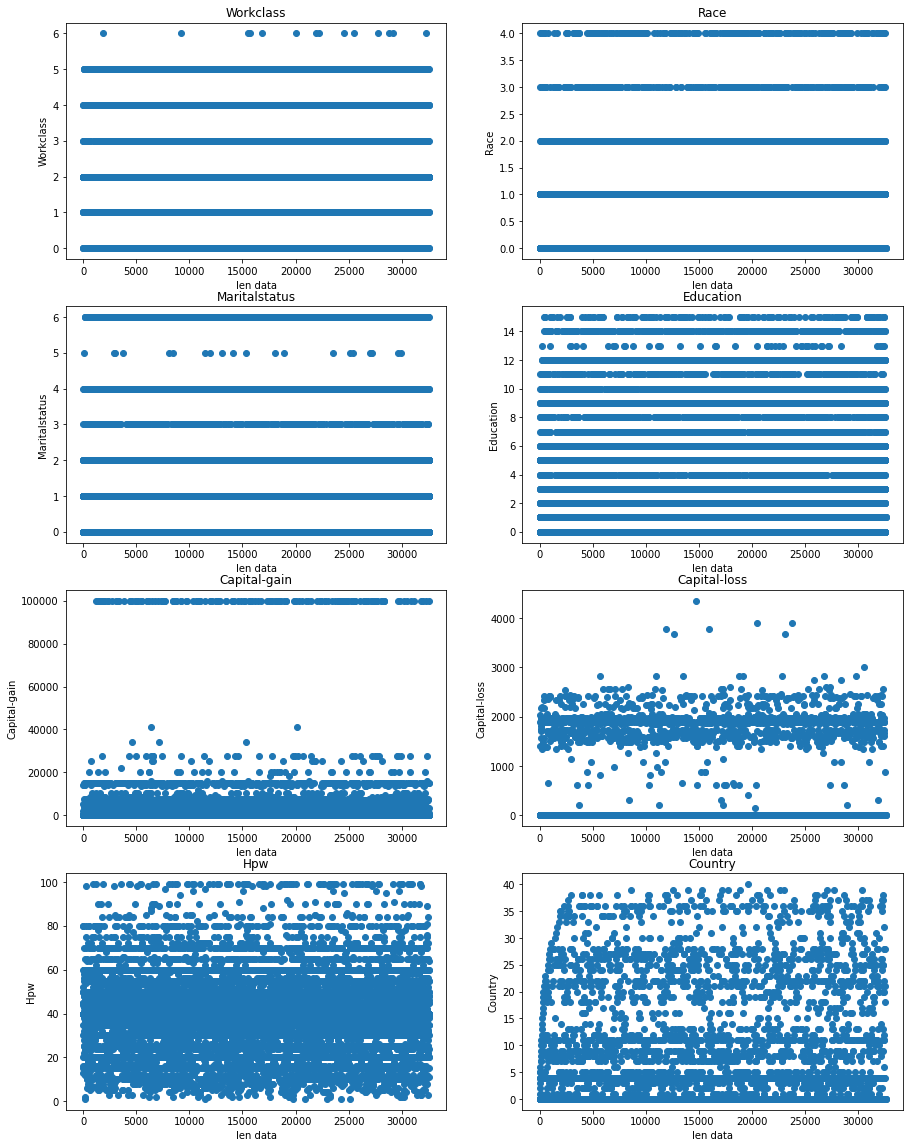

In [13]:
# la razón de que pasa eso
analisis = ['Workclass','Race','Maritalstatus','Education','Capital-gain','Capital-loss' ,'Hpw', 'Country']

fig= plt.figure(figsize=(15,20))
fig.clf()
ax = fig.subplots(4,2)

for i in range(4):
    p = i*2
    for y in range(2):
        ax[i,y].plot(data[analisis[p]],'o')
        ax[i,y].set_xlabel("len data")
        ax[i,y].set_ylabel(analisis[p])
        ax[i,y].set_title(analisis[p])
        p += 1

plt.show()


# 5) Verificar Desbalanceo

In [14]:
print(data['C'].value_counts())

0    22654
1     7508
Name: C, dtype: int64
